# Lab - 8

Name: Purusharth Malik

Registration No.: 2348542

### 1. Implement the Weather Prediction using RNN and LSTM.

#### Loading the data

In [2]:
import pandas as pd
data=pd.read_csv('austin-weather.csv')
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


#### Preprocessing

In [3]:
import numpy as np
import scipy.stats as stats
def drop_outlier(data,col_name):
    z= np.abs(stats.zscore(col_name))
    data.drop(data.index[np.where(abs(z)>2.5)],inplace=True)
drop_outlier(data,data['precipitation'])
drop_outlier(data,data['temp_max'])
drop_outlier(data,data['temp_min'])
drop_outlier(data,data['wind'])
data=data.drop(columns='date')
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in data.drop(columns='weather').columns:
    data[i]=sc.fit_transform(data[[i]])
data.head()

,precipitation,temp_max,temp_min,wind,weather
0,-0.503221,-0.540252,-0.679922,1.265942,drizzle
1,2.239635,-0.840696,-1.123174,1.108110,rain
2,-0.301911,-0.690474,-0.236670,-0.628046,rain
4,-0.176092,-1.072858,-1.123174,2.370769,rain
5,0.125874,-1.687403,-1.244060,-0.706962,rain


#### Splitting the dataset

In [5]:
X=data.drop(columns='weather')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(data['weather'])
from tensorflow.keras.utils import to_categorical
Y= to_categorical(Y)
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,stratify=Y,test_size=0.2)

#### LSTM model

In [24]:
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Input
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(Input(shape=(X_train.shape[1],1)))
model.add(LSTM(32, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [26]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 4, 32)             4352      
                                                                 
 dropout_8 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_11 (LSTM)              (None, 4, 64)             24832     
                                                                 
 dropout_9 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_12 (LSTM)              (None, 128)               98816     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 5)                

In [28]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=50,validation_data=(X_val, Y_val))

Epoch 1/50
35/35 [==============================] - 0s 7ms/step - loss: 0.6560 - accuracy: 0.7874 - val_loss: 0.6085 - val_accuracy: 0.8102
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: 0.6282 - accuracy: 0.8002 - val_loss: 0.6070 - val_accuracy: 0.8285
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 0.6282 - accuracy: 0.7965 - val_loss: 0.6322 - val_accuracy: 0.7956
Epoch 4/50
35/35 [==============================] - 0s 6ms/step - loss: 0.6052 - accuracy: 0.8102 - val_loss: 0.5661 - val_accuracy: 0.8285
Epoch 5/50
35/35 [==============================] - 0s 6ms/step - loss: 0.5950 - accuracy: 0.8175 - val_loss: 0.5764 - val_accuracy: 0.8248
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 0.5892 - accuracy: 0.8130 - val_loss: 0.5657 - val_accuracy: 0.8285
Epoch 7/50
35/35 [==============================] - 0s 6ms/step - loss: 0.5773 - accuracy: 0.8139 - val_loss: 0.5622 - val_accuracy: 0.8285
Epoch 8/50
35/35 [==

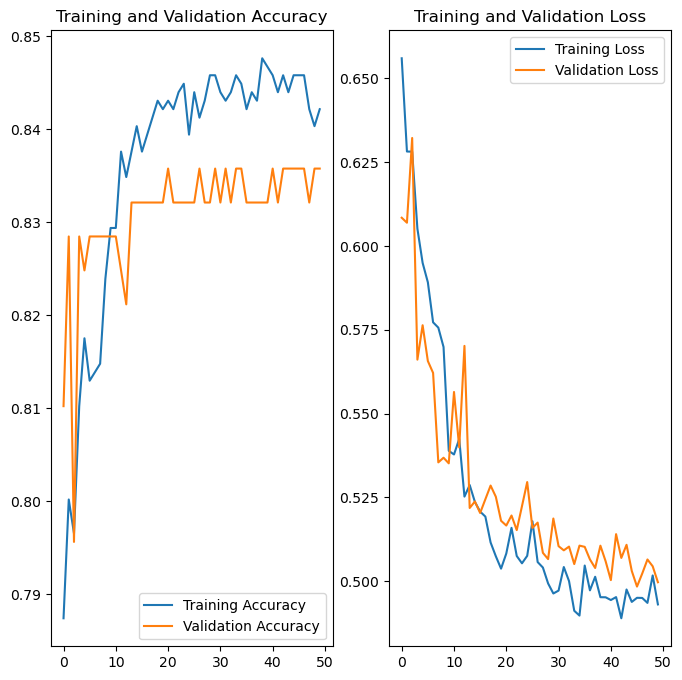

In [31]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### 2. Implement the Machine Translation using code or any tool.

We will use google translator to translate German text to English.

In [13]:
from deep_translator import GoogleTranslator

GoogleTranslator(source='auto', target='en').translate("guten Tag")

'Good day'

# End